**IMPORT LIBRARY LIKE TENSORFLOW, MATPLOTLIB, NUMPY, ETC**




In [1]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow import keras

**DOWNLOADING DATASET FROM KAGGLE**

we use kaggle to download our dataset. we put we put the dataset on the kaggle web because according to our group, downloading the dataset via the kaggle web is much easier

use your account token to upload the files
here your tutorial how to get your token [here](https://www.kaggle.com/docs/api)

In [3]:
! pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yogaciwapatra","key":"3b874917a9d690c7c9e416a692e38a7a"}'}

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d athallahreyhan/museum-basuki

 99% 0.98G/0.99G [00:12<00:00, 122MB/s]
100% 0.99G/0.99G [00:12<00:00, 81.5MB/s]


In [8]:
!unzip -q /content/museum-basuki.zip \
  && rm museum-basuki.zip

**SPLITTING OUR DATA SET INTO 70% TRAIN 20% VALIDATION 10% TEST USING SPLIT FOLDERS**

In [9]:
!pip install split-folders

In [10]:
import splitfolders
input_folder='/content/Museum Basoeki'

splitfolders.ratio(input_folder, output="Museum Basoeki",
                   seed=42, ratio=(.7,.2,.1),
                  group_prefix=None)

Copying files: 315 files [00:04, 75.70 files/s] 


**IMAGE AUGMENTATION**

We devised an ImageDataGenerator and integrated image augmentation due to the limited size of our available data.

In [11]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 45,
                                   width_shift_range = 0.25,
                                   height_shift_range = 0.25,
                                   shear_range = 0.25,
                                   zoom_range = 0.5,
                                   fill_mode = 'nearest',
                                   horizontal_flip = True)

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(224, 224),
                                                      shuffle = True)

  validation_datagen = ImageDataGenerator(rescale = 1./255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(224, 224),
                                                                shuffle=False)

  return train_generator, validation_generator

In [12]:
TRAINING_DIR = '/content/Museum Basoeki/train'
VALIDATION_DIR = '/content/Museum Basoeki/val'

In [13]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 217 images belonging to 10 classes.
Found 62 images belonging to 10 classes.


In [17]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_dataset = image_dataset_from_directory(TRAINING_DIR,
                                             shuffle=True,
                                             image_size=(224,224))

Found 217 files belonging to 10 classes.


In [18]:
class_names = train_dataset.class_names
print(class_names)

['Banteng', 'Ratu pantai selatan', 'air', 'batu batu sejarah', 'bencana', 'buruh', 'menyosong hari esok', 'penari sulawesi', 'ratu juliana', 'telaga sarangan']


In [19]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [20]:
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
history = model.fit(train_generator,
                    epochs=100,
                    steps_per_epoch=len(train_generator),
                    validation_data=validation_generator,
                    verbose = 2,
                    validation_steps=len(validation_generator))

Epoch 1/100
7/7 - 44s - loss: 2.3186 - accuracy: 0.0876 - val_loss: 2.2711 - val_accuracy: 0.3065 - 44s/epoch - 6s/step
Epoch 2/100
7/7 - 40s - loss: 2.2702 - accuracy: 0.1429 - val_loss: 2.2267 - val_accuracy: 0.1613 - 40s/epoch - 6s/step
Epoch 3/100
7/7 - 37s - loss: 2.2172 - accuracy: 0.1429 - val_loss: 2.1407 - val_accuracy: 0.2581 - 37s/epoch - 5s/step
Epoch 4/100
7/7 - 37s - loss: 2.1355 - accuracy: 0.2857 - val_loss: 2.0056 - val_accuracy: 0.3710 - 37s/epoch - 5s/step
Epoch 5/100
7/7 - 39s - loss: 1.9934 - accuracy: 0.3410 - val_loss: 1.8306 - val_accuracy: 0.3871 - 39s/epoch - 6s/step
Epoch 6/100
7/7 - 34s - loss: 1.8066 - accuracy: 0.3594 - val_loss: 1.6388 - val_accuracy: 0.4516 - 34s/epoch - 5s/step
Epoch 7/100
7/7 - 37s - loss: 1.6811 - accuracy: 0.3733 - val_loss: 1.5037 - val_accuracy: 0.5000 - 37s/epoch - 5s/step
Epoch 8/100
7/7 - 36s - loss: 1.5933 - accuracy: 0.4055 - val_loss: 1.3385 - val_accuracy: 0.6129 - 36s/epoch - 5s/step
Epoch 9/100
7/7 - 37s - loss: 1.4657 - a

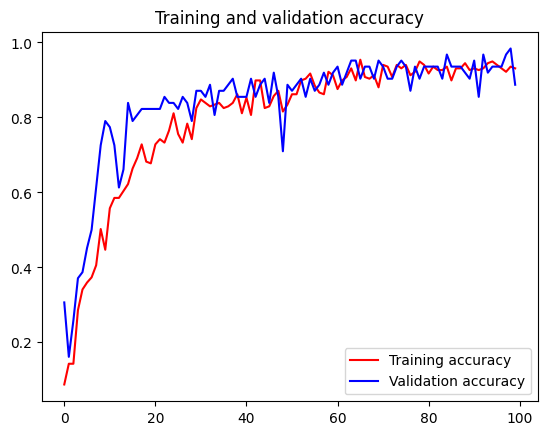

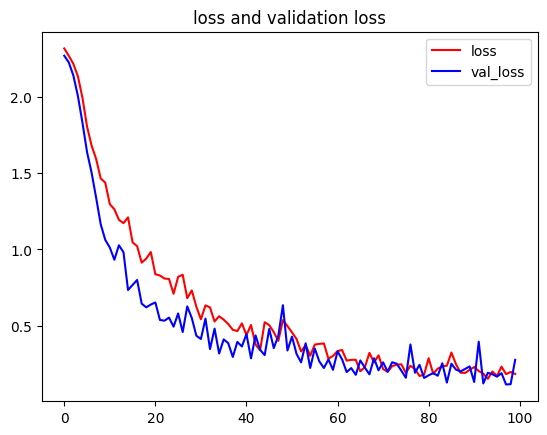

<Figure size 640x480 with 0 Axes>

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.title('loss and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

**TRANSFER LEARNING**

We utilize transfer learning with InceptionV3 for image classification, leveraging pre-trained knowledge to recognize and categorize images accurately.

In [23]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-12-19 06:04:15--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.159.207, 142.251.161.207, 74.125.126.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.159.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   173MB/s    in 0.5s    

2023-12-19 06:04:16 (173 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [24]:
# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [25]:
def create_pre_trained_model(local_weights_file):

  pre_trained_model = InceptionV3(weights='imagenet',
                              include_top=False,
                              input_shape=(224,224, 3))

  #pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layers in pre_trained_model.layers:
    layers.trainable = False



  return pre_trained_model

and then we print the InceptionV3 model summary

In [26]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d_4[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activatio

In [27]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.95 and logs.get('val_accuracy')>=0.95):
      print("\nReached 95.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [28]:
def output_of_last_layer(pre_trained_model):

  last_desired_layer = pre_trained_model.get_layer('mixed4')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)


  return last_output

In [29]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 12, 12, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 12, 12, 768), dtype=tf.float32, name=None), name='mixed4/concat:0', description="created by layer 'mixed4'")


In [30]:
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.src.engine.functional.Functional'>


we add our architecture like we flatten it first and the we add dense layer and the multiclass dense layer with softmax activation. after that we compile it with adam optimazer and low learning rate (0.0001) and use categorical crossentropy loss function.

In [31]:
x = keras.layers.Flatten()(last_output)
x = keras.layers.Dense (256, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense (10, activation='softmax')(x)
model2 = Model(pre_trained_model.input, x)
model2.summary()

model2.compile(optimizer=keras.optimizers.Adam(0.0001),  # Low learning rate
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d_4[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [32]:
callbacks = myCallback()
history = model2.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 100,
                    callbacks = [callbacks]
                    )

Epoch 1/100
7/7 [==============================] - 48s 6s/step - loss: 3.4716 - accuracy: 0.1659 - val_loss: 1.7268 - val_accuracy: 0.3710
Epoch 2/100
7/7 [==============================] - 38s 6s/step - loss: 2.1428 - accuracy: 0.3041 - val_loss: 1.2377 - val_accuracy: 0.7258
Epoch 3/100
7/7 [==============================] - 39s 6s/step - loss: 1.6778 - accuracy: 0.4700 - val_loss: 1.0344 - val_accuracy: 0.8065
Epoch 4/100
7/7 [==============================] - 37s 5s/step - loss: 1.3137 - accuracy: 0.5622 - val_loss: 0.7389 - val_accuracy: 0.9032
Epoch 5/100
7/7 [==============================] - 39s 6s/step - loss: 1.1513 - accuracy: 0.6175 - val_loss: 0.5571 - val_accuracy: 0.9032
Epoch 6/100
7/7 [==============================] - 39s 6s/step - loss: 1.0507 - accuracy: 0.6406 - val_loss: 0.4806 - val_accuracy: 0.9355
Epoch 7/100
7/7 [==============================] - 38s 5s/step - loss: 0.9654 - accuracy: 0.6820 - val_loss: 0.4669 - val_accuracy: 0.9032
Epoch 8/100
7/7 [==========

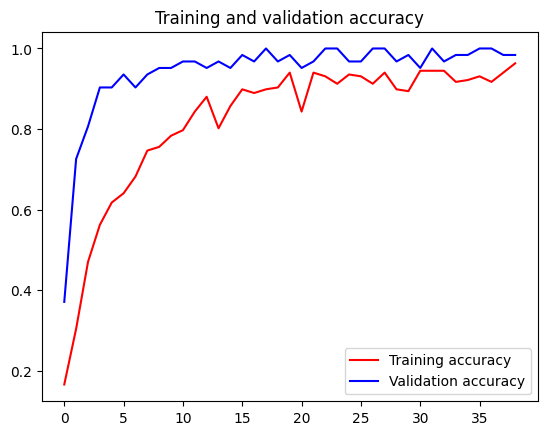

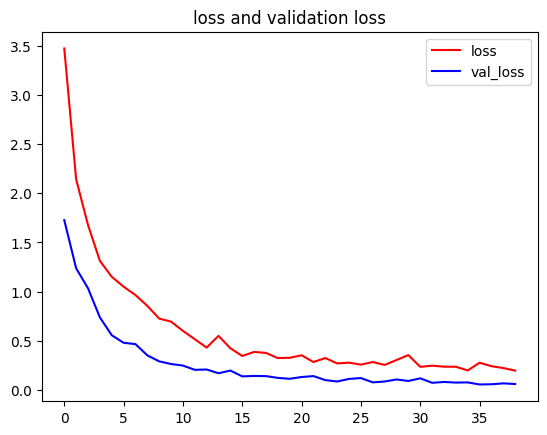

<Figure size 640x480 with 0 Axes>

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.title('loss and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

**FINE TUNING**

Fine-tuning in transfer learning means taking a smart model that already knows a lot and giving it a bit of extra training so it becomes really good at a specific task.

In [35]:
from tensorflow import keras
pre_trained_model.trainable = True
#model2.summary()

model2.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
                loss = keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics = ['accuracy']
)


model2.fit(train_generator,
           validation_data=validation_generator,
           epochs = 10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


7/7 [==============================] - 57s 5s/step - loss: 0.4281 - accuracy: 0.8802 - val_loss: 0.0807 - val_accuracy: 0.9677
Epoch 2/10
7/7 [==============================] - 39s 6s/step - loss: 0.2455 - accuracy: 0.9401 - val_loss: 0.1042 - val_accuracy: 0.9516
Epoch 3/10
7/7 [==============================] - 38s 5s/step - loss: 0.2009 - accuracy: 0.9539 - val_loss: 0.1081 - val_accuracy: 0.9516
Epoch 4/10
7/7 [==============================] - 35s 5s/step - loss: 0.2167 - accuracy: 0.9309 - val_loss: 0.0993 - val_accuracy: 0.9677
Epoch 5/10
7/7 [==============================] - 39s 6s/step - loss: 0.1756 - accuracy: 0.9631 - val_loss: 0.0882 - val_accuracy: 0.9677
Epoch 6/10
7/7 [==============================] - 39s 6s/step - loss: 0.2308 - accuracy: 0.9263 - val_loss: 0.0808 - val_accuracy: 0.9677
Epoch 7/10
7/7 [==============================] - 39s 5s/step - loss: 0.2300 - accuracy: 0.9447 - val_loss: 0.0768 - val_accuracy: 0.9677
Epoch 8/10
7/7 [=============================

**TESTING**

Saving 20231121_141117 - Copy.jpg to 20231121_141117 - Copy (1).jpg
Saving images.jpg to images (1).jpg
Saving img-20231018-wa0016-652fc02a110fce5d0d31d562.jpg to img-20231018-wa0016-652fc02a110fce5d0d31d562.jpg
Saving lukisan-nyai-roro-kidul_20170803_162916.jpg to lukisan-nyai-roro-kidul_20170803_162916.jpg
Saving photo2jpg.jpg to photo2jpg.jpg
1/1 [==============================] - 0s 38ms/step


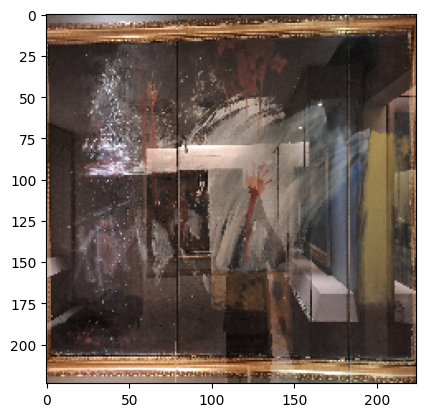

Banteng: 0.00%
Ratu pantai selatan: 0.01%
air: 99.85%
batu batu sejarah: 0.07%
bencana: 0.03%
buruh: 0.04%
menyosong hari esok: 0.01%
penari sulawesi: 0.00%
ratu juliana: 0.00%
telaga sarangan: 0.00%

Result:
air: 99.85%
1/1 [==============================] - 0s 32ms/step


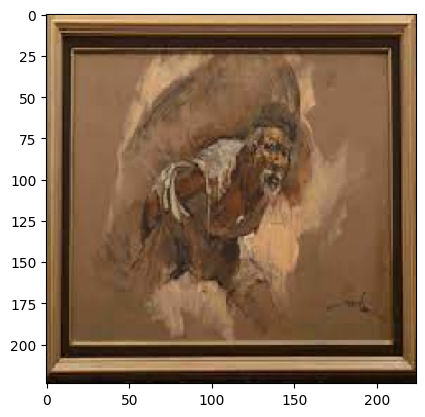

Banteng: 0.82%
Ratu pantai selatan: 0.20%
air: 0.08%
batu batu sejarah: 1.36%
bencana: 0.07%
buruh: 96.25%
menyosong hari esok: 0.04%
penari sulawesi: 0.18%
ratu juliana: 0.98%
telaga sarangan: 0.03%

Result:
buruh: 96.25%
1/1 [==============================] - 0s 31ms/step


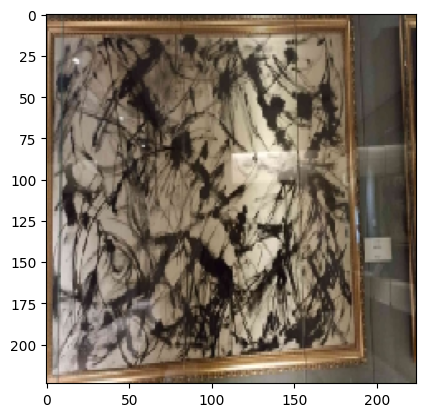

Banteng: 0.00%
Ratu pantai selatan: 0.00%
air: 0.00%
batu batu sejarah: 0.00%
bencana: 100.00%
buruh: 0.00%
menyosong hari esok: 0.00%
penari sulawesi: 0.00%
ratu juliana: 0.00%
telaga sarangan: 0.00%

Result:
bencana: 100.00%
1/1 [==============================] - 0s 38ms/step


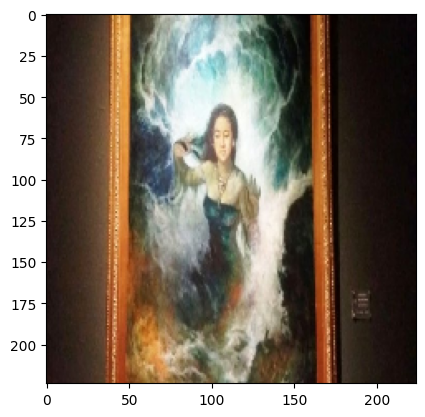

Banteng: 3.68%
Ratu pantai selatan: 93.26%
air: 0.75%
batu batu sejarah: 0.18%
bencana: 0.02%
buruh: 0.41%
menyosong hari esok: 0.11%
penari sulawesi: 0.00%
ratu juliana: 1.56%
telaga sarangan: 0.03%

Result:
Ratu pantai selatan: 93.26%
1/1 [==============================] - 0s 39ms/step


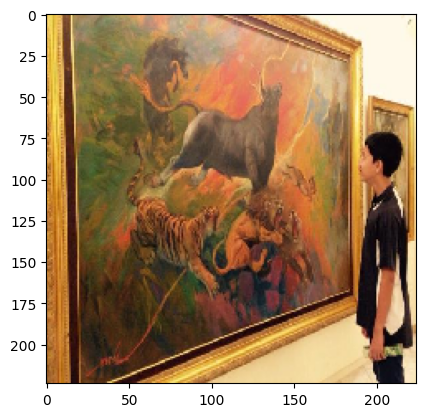

Banteng: 99.56%
Ratu pantai selatan: 0.02%
air: 0.00%
batu batu sejarah: 0.34%
bencana: 0.03%
buruh: 0.02%
menyosong hari esok: 0.00%
penari sulawesi: 0.00%
ratu juliana: 0.02%
telaga sarangan: 0.00%

Result:
Banteng: 99.56%


In [45]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

labels = train_generator.class_indices.keys()
uploaded = files.upload()

for paths in uploaded.keys():
    path = paths
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    images = np.vstack([x])
    proba = model2.predict(images)[0]
    maxx = proba.max()
    plt.imshow(img)
    plt.show()

    for (label, p) in zip(labels, proba):
        print("{}: {:.2f}%".format(label, p * 100))

    max_index = np.argmax(proba)
    max_proba = proba[max_index]
    max_label = list(labels)[max_index]

    if max_proba >= 0.7:
        print('\nResult:')
        print("{}: {:.2f}%".format(max_label, max_proba * 100))
    else:
        print('\nResult:')
        print('Hasil tidak ditemukan!')

**SAVING MODEL**

we save our model into tensorflow format and we convert it to model.tflite afterthat we use quantization for minimize our model

In [46]:
#Save the model in TensorFlow format
model2.save("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
import tensorflow as tf

# Load the TensorFlow model
model = tf.keras.models.load_model('/content/my_model.h5')

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model to a .tflite file
with open('converted_model.tflite', 'wb') as f:
    f.write(tflite_model)

In [59]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Save the quantized model to a .tflite file
with open('modelquantized.tflite', 'wb') as f:
    f.write(tflite_quantized_model)